## Постановка задачи

Этот набор данных изначально получен из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из большей базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения пима.

Классифицировать / предсказать, склонен ли пациент к диабету, в зависимости от множества признаков.

### Подключение модулей

In [5]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Отключим предупредения
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [8]:
# загружаем данные из файла в формате CSV и сохраняем в дата-фрейм (переменную df)
df = pd.read_csv('diabetes.csv')

In [9]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### Описание признаков

Pregnancis : Количество беременностей

Glucose: концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе.

BloodPressure: Диастолическое кровяное давление (мм рт. ст.)

SkinThickness: Толщина кожной складки трицепса (мм)

Insulin: 2-часовой сывороточный инсулин (ме Ед/мл)

BMI : индекс массы тела (вес в кг/(рост в м)^2)

DiabetesPedigreeFunction: указывает функцию, которая оценивает вероятность диабета на основе семейной истории.

Age: Возраст (годы)

Outcome: Переменная класса (0 или 1)


### Разведочный анализ данных (РАД, EDA)


Исследовательский анализ данных (EDA), также известный как исследование данных, представляет собой этап в процессе анализа данных, на котором используется ряд методов для лучшего понимания используемого набора данных.

На этом шаге мы выполним следующие операции:

3.1) Понимание ваших переменных 3.1.1) Заголовок набора данных 3.1.2) Форма набора данных 3.1.3) Типы списка всех столбцов 3.1.4) Информация о наборе данных 3.1.5) Краткое описание набора данных

3.2) Очистка данных

3.2.1) Проверьте ДУБЛИКАТЫ 
3.2.2) Проверьте нулевые значения

In [14]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(768, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


9 признаков, 8 - числовые признаки, 1 - бинарный (целевая переменная)
Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной, Outcome.

In [17]:
# отобразим 10 записей данных, отобранных случайным образом
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
520,2,68,70,32,66,25.0,0.187,25,0
186,8,181,68,36,495,30.1,0.615,60,1
748,3,187,70,22,200,36.4,0.408,36,1
735,4,95,60,32,0,35.4,0.284,28,0
17,7,107,74,0,0,29.6,0.254,31,1
576,6,108,44,20,130,24.0,0.813,35,0
744,13,153,88,37,140,40.6,1.174,39,0
280,0,146,70,0,0,37.9,0.334,28,1
188,8,109,76,39,114,27.9,0.640,31,1
337,5,115,76,0,0,31.2,0.343,44,1


3.1.5) Краткое описание набора данных

Описанный метод поможет увидеть, как данные были распределены по числовым значениям. Мы можем четко видеть минимальное значение, средние значения, различные процентильные значения и максимальные значения.

In [19]:
# статистическая информация
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Наблюдение: В приведенной выше таблице минимальное значение столбцов "Глюкозы", "Кровяное давление", "Болезненность кожи", "инсулин", "ИМТ" равно нулю (0).Понятно, что эти значения не могут быть равны нулю.Итак, собираемся приписать средние значения этих соответствующих столбцов вместо нуля.

Мы замечаем, что все столбцы являются числовыми, и ни в одном столбце нет пропущенного значения. Пока все хорошо. Но если мы посмотрим на приведенную выше таблицу, некоторые столбцы имеют минимальное значение ноль, что неприемлемо. Например, значение глюкозы не может быть равно 0 ни для одной женщины. Точно так же кровяное давление, толщина кожи, инсулин и ИМТ не могут быть равны нулю. Давайте проанализируем и решим это с помощью возможных корректирующих мер.

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df=df.drop_duplicates()

In [23]:
df.shape

(768, 9)

In [24]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',]
for col in cols:
    print(col, df[df[col] == 0][col].value_counts())

Glucose Glucose
0    5
Name: count, dtype: int64
BloodPressure BloodPressure
0    35
Name: count, dtype: int64
SkinThickness SkinThickness
0    227
Name: count, dtype: int64
Insulin Insulin
0    374
Name: count, dtype: int64
BMI BMI
0.0    11
Name: count, dtype: int64


Таких записей много. Очевидно, что мы не можем удалить все те строки, в которых есть нулевые записи. Один из способов, с которым мы можем справиться, - это заменить все эти ячейки соответствующими средними значениями. Глядя на природу набора данных, я думаю, что это может быть корректирующей мерой. Давайте реализуем с помощью кода python.

In [26]:
for col in cols:
    df[col] = df[col].replace(0,np.NaN)
    mean = int(df[col].mean(skipna = True))
    df[col] = df[col].replace(np.NaN, mean)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

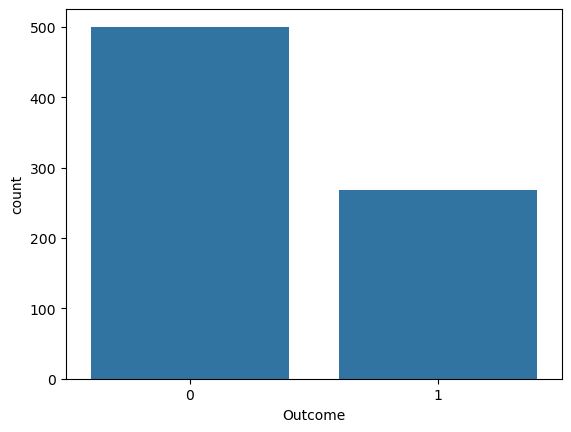

In [28]:
sns.countplot(x = 'Outcome', data = df)

Набор данных несбалансирован
Из-за этого прогнозы будут смещены в сторону случаев, не связанных с диабетом.
итак, мы должны сбалансировать этот класс

Из 768 человек 268 страдают диабетом (положительный результат (1)) и 500 не страдают диабетом (отрицательный результат (0)).

В столбце "Результат" 1 означает положительный результат при диабете, а 0 - отрицательный результат при диабете

Встречный график говорит нам, что набор данных несбалансирован, поскольку число пациентов, у которых нет диабета, больше, чем у тех, у кого диабет

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

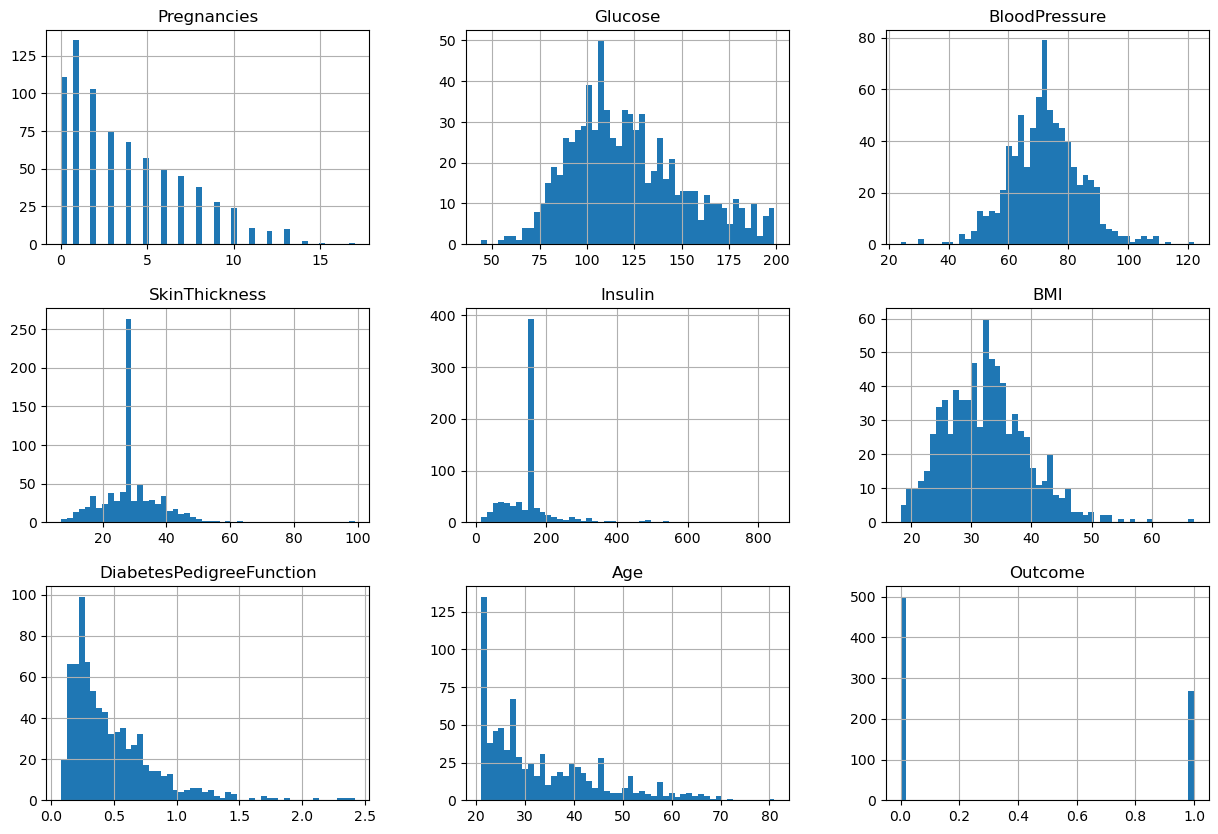

In [30]:
df.hist(figsize = (15,10), bins = 50)

Беременность, инсулин, функция родословной диабета, толщина кожи и возраст имеют положительное или обоснованное искаженное распределение данных.
Распределение данных по глюкозе, кровяному давлению и ИМТ близко к нормальному распределению

Беременность нормально иметь нулевые значения, а также есть выбросы.

Glucose Выбросов немного, а распределение нормальное, поэтому мы решили заполнить нули средним значением.

BloodPressure Похоже, что есть несколько выбросов как на более высоком, так и на более низком уровне. Но на более высоком уровне максимальное кровяное давление составляет 122, так что это значительно. Сейчас на нижнем уровне BP около 25 не имеет смысла. поэтому мы решили заменить нули медианой и удалить выбросы.

есть некоторые отклонения, но они значимы, что возраст может составлять 60,70,80

<Axes: ylabel='SkinThickness'>

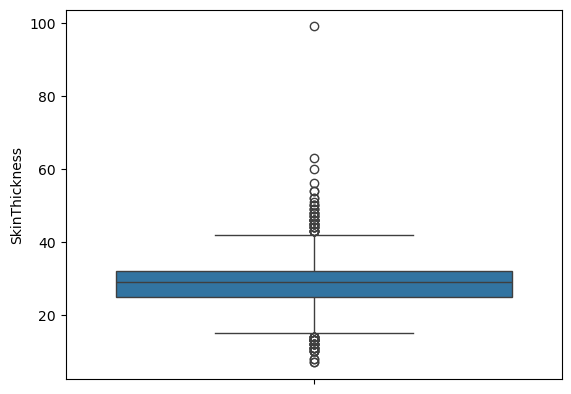

In [32]:
sns.boxplot(df['SkinThickness'])

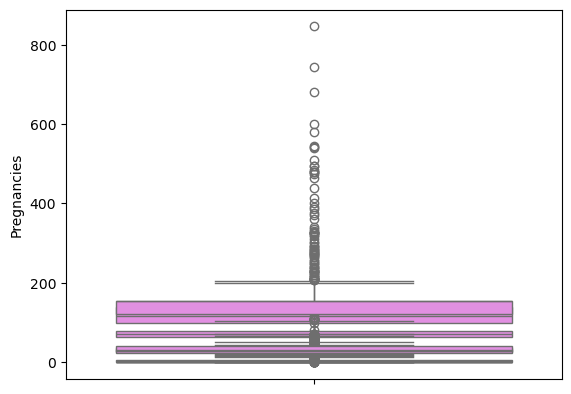

In [33]:
cols = df.columns
for col in cols:
    sns.boxplot(df[col] ,color='Violet') 


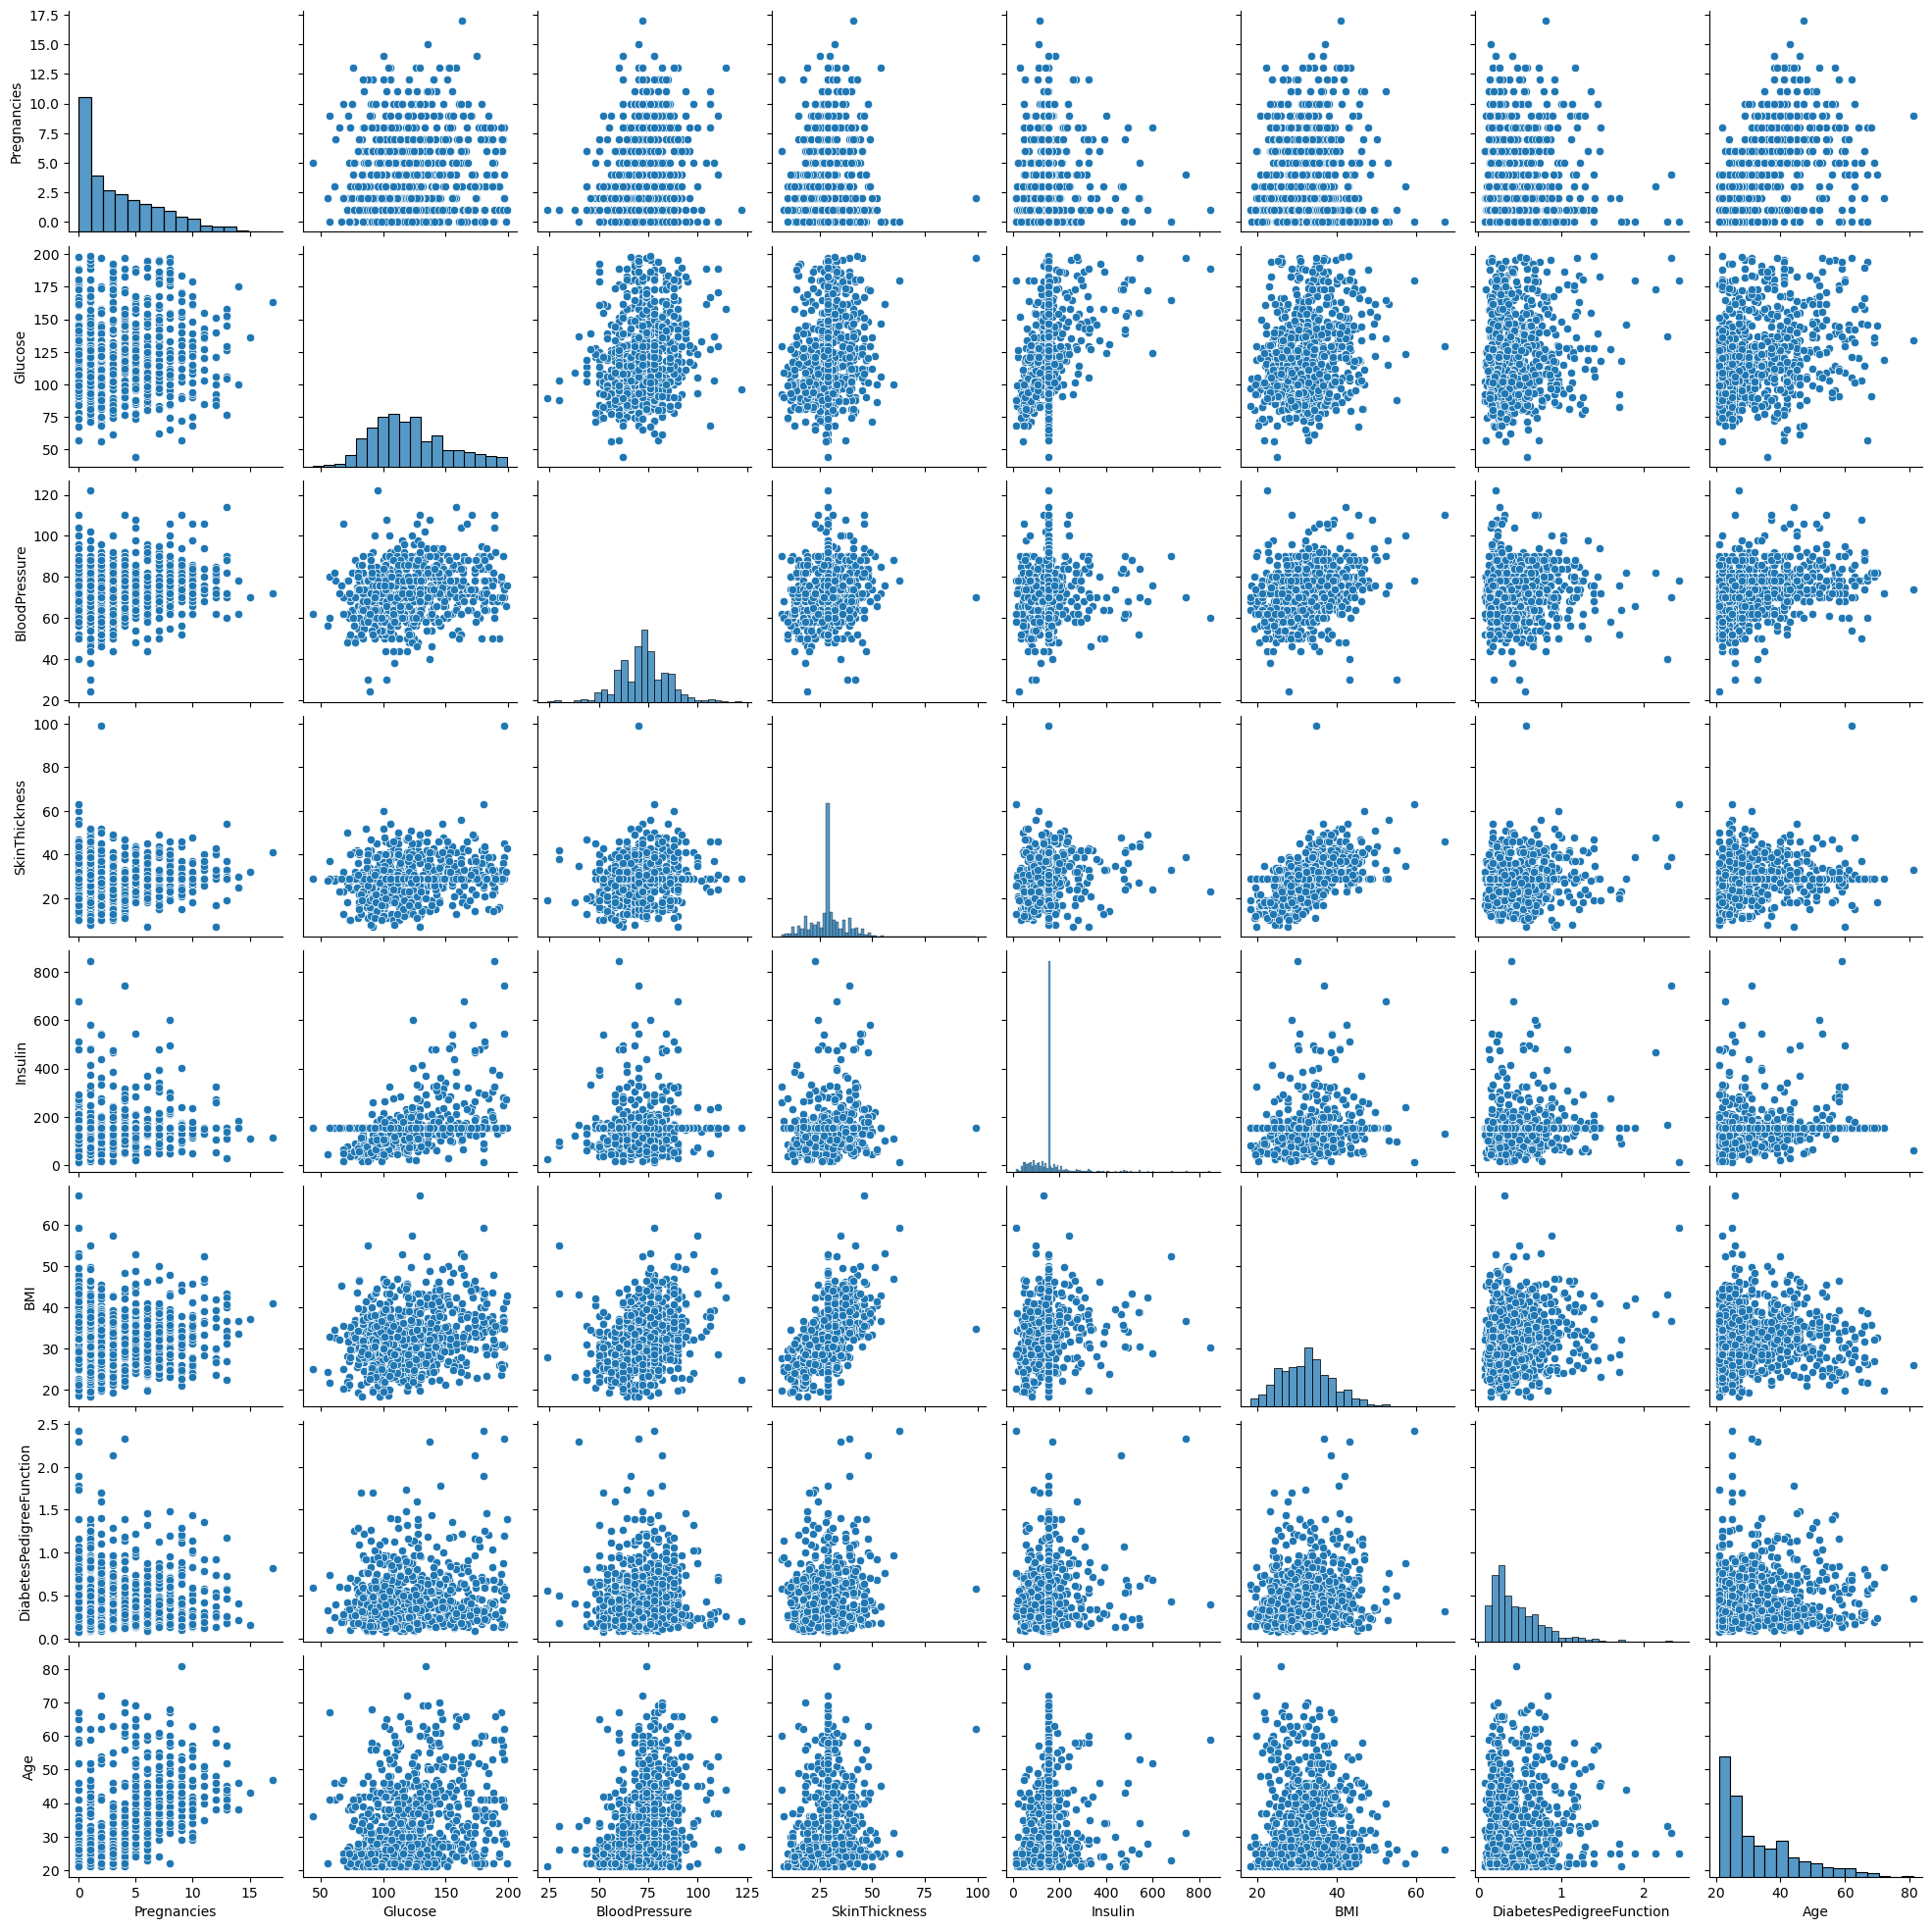

In [34]:
sns.pairplot(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

диаграмма рассеяния - это тип графика, который "отображает" значения двух переменных по двум осям, таким как возраст и рост. Диаграммы рассеяния полезны по многим причинам: подобно корреляционным матрицам, они позволяют быстро понять взаимосвязь между двумя переменными.

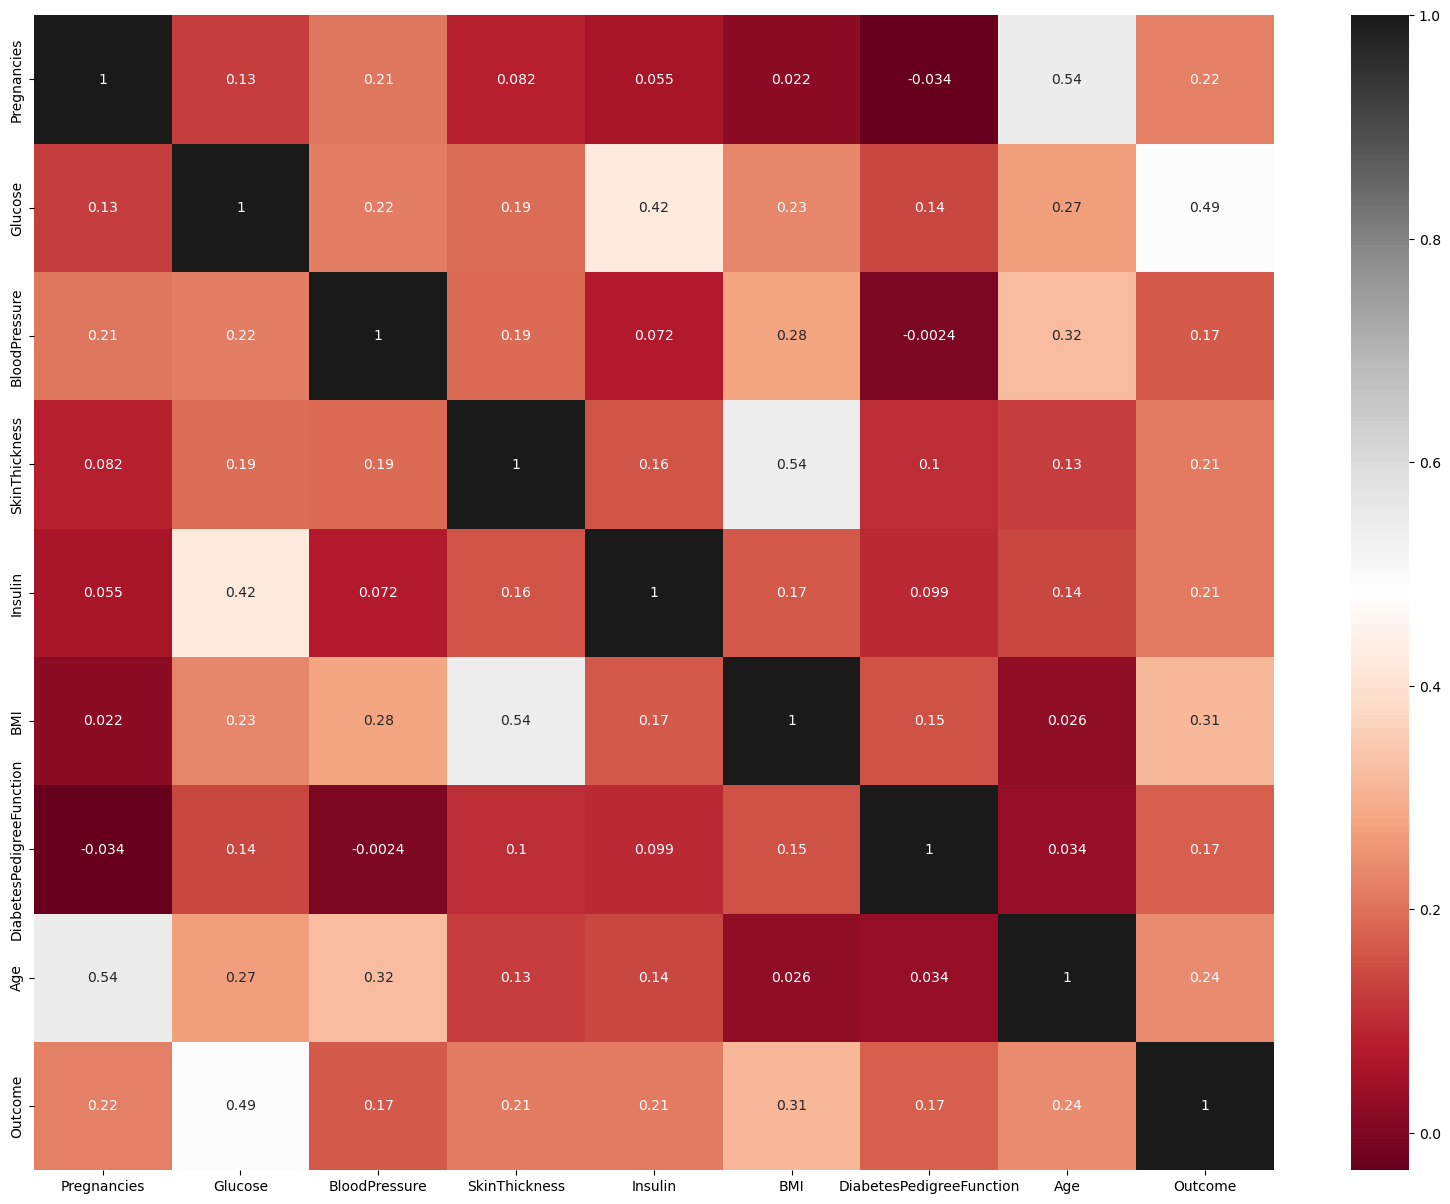

In [36]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap = 'RdGy',annot = True,cbar=True);

Наблюдение:

Корреляция между исходом и уровнем глюкозы высока.
Высокий коэффициент корреляции с беременностями и возрастом.
Высокий коэффициент корреляции с толщиной кожи и ИМТ.
- - Теперь давайте визуализируем корреляцию между ИМТ и толщиной кожи

### Обучение моделей (models fitting)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
# Разделяем выборку на обучающую и тестовую 

from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:8]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify = y)

In [46]:
X_train.shape

(614, 8)

In [48]:
X_test.shape

(154, 8)

In [49]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [50]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [51]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
X_train

array([[ 0.88959015,  1.24595377, -1.55156346, ..., -0.28680348,
         0.36153906,  0.44392698],
       [-0.29524358,  0.26436751, -0.7323529 , ..., -1.34238896,
        -0.46498473, -0.99556038],
       [ 1.18579858,  1.47499056,  2.70833147, ...,  0.725988  ,
        -0.91444474,  0.78262989],
       ...,
       [-0.59145202, -1.24073143, -1.87924768, ..., -0.30106815,
         1.50781293, -1.08023611],
       [-0.88766045,  0.7224411 ,  0.74222612, ...,  1.25378074,
         0.41885275, -0.48750602],
       [-1.18386888,  0.62428247,  0.90606823, ..., -0.01577477,
        -0.10602002, -0.99556038]])

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=21, p=2, metric='euclidean')

In [63]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 4.52 ms


KNeighborsClassifier()

In [64]:
y_pred =  knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[88, 12],
       [30, 24]], dtype=int64)

In [66]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.5333333333333333


In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7272727272727273


Таким образом, на данный момент у нас показатель f1 равен 0,747, а показатель точности - 0,8333. Я думаю, что это можно улучшить. Во всяком случае, не так уж плохо. Давайте построим график для фактических данных и нашего прогнозируемого значения с помощью seaborn distplot.

In [69]:
%%time

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 7.52 ms


DecisionTreeClassifier(random_state=1)

In [70]:
%%time

# создадим объект этого класса и запишем его в переменную model
lrm = LogisticRegression()
 
# обучим нашу модель
lrm.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 10.7 ms


LogisticRegression()

In [71]:
%%time

svc = SVC()
svc.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 10 ms


SVC()

In [72]:
tree_prediction = tree.predict(X_test)

In [75]:
# Оценка точности — простейший вариант оценки работы классификатора
print(accuracy_score(tree_prediction, y_test))

# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print(confusion_matrix(tree_prediction, y_test))
print(classification_report(tree_prediction, y_test))

0.6753246753246753
[[78 28]
 [22 26]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       106
           1       0.48      0.54      0.51        48

    accuracy                           0.68       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.69      0.68      0.68       154



In [76]:
lrm_prediction = lrm.predict(X_test)

In [77]:
# Оценка точности — простейший вариант оценки работы классификатора
print(accuracy_score(lrm_prediction, y_test))

# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print(confusion_matrix(lrm_prediction, y_test))
print(classification_report(lrm_prediction, y_test))

0.7467532467532467
[[90 29]
 [10 25]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       119
           1       0.46      0.71      0.56        35

    accuracy                           0.75       154
   macro avg       0.68      0.74      0.69       154
weighted avg       0.80      0.75      0.76       154



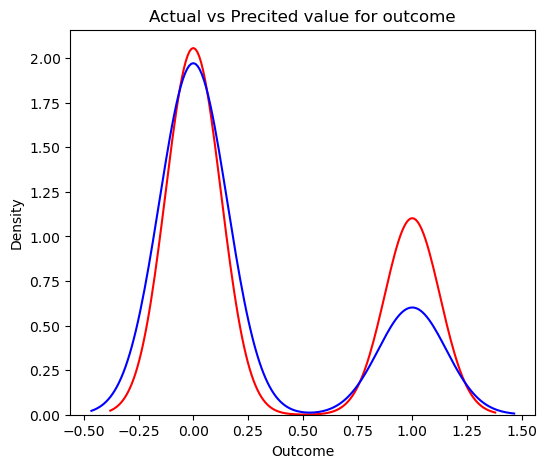

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))

ax = sns.distplot(df['Outcome'], hist=False, color="red", label="Actual Value")
sns.distplot(y_pred, hist=False, color="blue", label="Predicted Values",  ax=ax)

plt.title('Actual vs Precited value for outcome')
plt.show()

Это отличный набор данных, который помогает нам взглянуть на совершенно особый случай и посмотреть через призму данных. Это целевой объект в категориальном формате, в то время как входные объекты находятся в числовом формате.
Информация, полученная из раздела СМИ, и информация о домене во многом совпадают с некоторыми несоответствиями. Информация о домене представляет собой обобщенные данные, в то время как собранные данные EDA основаны на демографической области.